# PRACTICE CASE 'EXPLORATORY DATA ANALYSIS'

#### NAME : RAMZY MOHAMMAD
#### IYKRA DATA FELLOWSHIP BATCH 6

# SCENARIO
Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

This data set is wide ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. 
This data was gathered from 
1) BBC Sports Football,<br> 
2) Premierleague.com <br>
3) Transfermarkt.co.uk 


# DATASET

Dataset yang diperlukan untuk EDA dapat diunduh:https://github.com/Syukrondzeko/Fellowship

Dataset tersebut terdiri dari 20 Baris dan 44 Kolom dan berisikan data tentang Klasemen akhir `English Primer League`, berikut fitur-fiturnya:
- Team
- category
- general_league_position
- finance_live_games_televised
- finance _tv_revenue
- general_matches_played	
- general_won
- general_draw	
- general_lost
- attack_scored
- defence_goals_conceeded
- general_goal_difference
- general_points
- general_squad_size
- general_squad_average_age
- general_squad_foreigners
- finance _team_market
- finance _market_average
- attack_passes
- attack_passes_through
- attack_passes_long
- attack_passes_back
- attack_crosses
- attack_corners_taken
- attack_shots
- attack_shots_on_target
- attack_goals_headed
- attack_goals_penalty
- attack_goals_box	
- attack_goals_outsidebox	
- general_card_yellow	
- general_card_red	
- attack_goals_counter	
- attack_goals_freekick	
- defence_saves	
- defence_blocks	
- defence_interceptions	
- defence_tackles	
- defence_tackles_last_man	
- defence_clearances	
- defence_clearances_headed	
- defence_penalty_conceeded	
- attack_posession	
- attack_pass_accuracy

Berikut ini adalah 6 pertanyaan yang harus dijawab oleh Peserta Data Fellowship batch 6:<br>

1.	Is this data clean? 
2.	How is the point distribution of the epl team? and which team is an anomaly?
3.	Which team has the best attack? 
4.	Which team has the best defence? 
5.	Which team is good in the financial aspect? 
6.	Explore your creativity!




# 1. Import package yang diperlukan

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

# 2. Load data yang digunakan

In [111]:
df = pd.read_csv("epl_1819.csv")

In [112]:
df

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,11,66,26,27.3,21,550440000,22017600,"19,202",63,"2,242","2,634",638,200,526,225,4,9,55,10,73,4,4,2,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,1,57,23,27.2,13,369600000,16068800,"16,618",51,"2,552","2,515",622,195,477,152,10,4,44,3,72,1,5,2,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,46,8,54,26,27.0,16,305360000,11748000,"16,494",44,"2,310","2,362",814,215,498,169,13,2,45,10,55,4,3,0,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,48,3,52,26,29.0,18,284240000,10929600,"17,219",88,"2,335","2,593",779,210,515,184,9,5,43,8,57,5,8,3,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,55,-3,52,26,28.3,18,234212000,9011200,"16,358",75,"2,315","2,273",630,188,441,157,10,5,47,5,59,1,3,0,148,141,457,723,5,855,397,5,49.0,78.7


# 3. Data Pre-processing

## 3.1 Check missing value

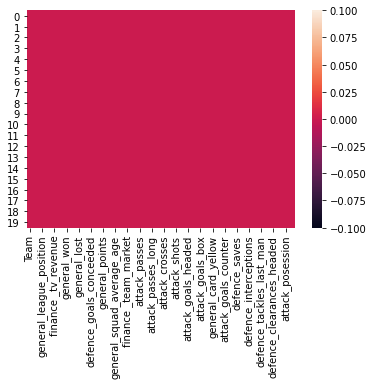

In [113]:
sns.heatmap(df.isna())
plt.show()

In [114]:
df.isna().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

**Berdasarkan informasi di atas, fitur-fitur pada Dataset EPL_1819 sudah tidak ada missing value**

## 3.2 Check Duplicate data

In [115]:
# check data duplicate
df.drop_duplicates(inplace=True)

**Berdasarkan informasi di atas, fitur-fitur pada Dataset EPL_1819 tidak ada yang duplikat.**

## 3.3 Memperbaiki tipe data yang tidak sesuai

In [118]:
df['attack_passes_new'] = df['attack_passes'].str.replace(',','')
df['attack_passes_long_new'] = df['attack_passes_long'].str.replace(',','')
df['attack_passes_back_new'] = df['attack_passes_back'].str.replace(',','')

In [121]:
df[['attack_passes_new', 'attack_passes_long_new','attack_passes_back_new' ]] = df[['attack_passes_new', 'attack_passes_long_new','attack_passes_back_new' ]].apply(pd.to_numeric)

In [153]:
df['defence_clearances_new'] = df['defence_clearances'].str.replace(',','')

In [154]:
df[['defence_clearances_new']] = df[['defence_clearances_new']].apply(pd.to_numeric)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

# Nomer 1
## Is this data clean?

**Dari inspeksi yang dilakukan terhadap dataset EPL_1819, fitur-fitur dataset EPL_1819 tidak memiliki missing value dan data duplikat, tetapi ada beberapa fitur yang memiliki tipe data tidak sesuai. Sehingga dapat dikatan bahwa dataset EPL_1819 masih kotor**

# Nomer 2

## How is the point distribution of the epl team? and which team is an anomaly?

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


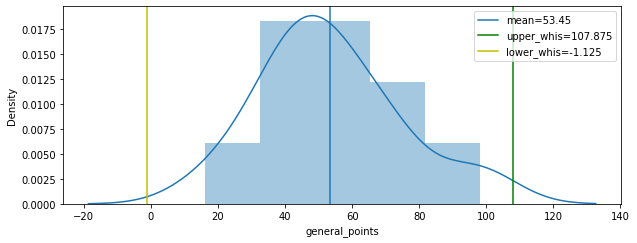

In [192]:
iqr = df['general_points'].quantile(0.75) - df['general_points'].quantile(0.25)
upper_whis = df['general_points'].quantile(0.75) + (1.5*iqr)
lower_whis = df['general_points'].quantile(0.25) - (1.5*iqr)

f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['general_points'])
c = df.general_points.mean()
plt.axvline(df['general_points'].mean(), label= (f'mean={c}'))
plt.axvline(upper_whis, label= f'upper_whis={upper_whis}', color='g')
plt.axvline(lower_whis, label= f'lower_whis={lower_whis}', color='y')
# plt.axvline(df['general_points'].mean(), label= (f'mean={c}'))
plt.legend()
plt.savefig('foo.png')

**Dari grafik di atas ternyata distribusi POINTS mendekati distribusi normal**<br>
<br>
**Dapat dikatakan tidak ada TEAM EPL yang memiliki POINTS yang ANOMALY karena tidak ada TEAM yang dimana POINTSnya terletak diluar upper whisker dan lower whisker**

# Nomer 3
## Which team has the best attack?

**Untuk mencari tim dengan predikat THE BEST ATTACK, fitur-fitur yang memiliki kata kunci 'attack' akan dipakai karena untuk menjadi THE BEST ATTACK tidak hanya dilihat dari attack yang membuahkan goal saja tetapi dilihat juga bagaimana tim tersebut menciptakan serangan dan mengancam pertahanan lawan**<br>

**Karena fitur-fitur tersebut memiliki ukuran yang berbeda-beda maka fitur-fitur tersebut akan dilakukan standarisasi terlebih dahulu, selanjutnya akan diambil rata-rata dari semua fitur tersebut** 

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [132]:
X = df[['attack_scored', 'attack_posession', 'attack_pass_accuracy', 'attack_passes_new', 'attack_passes_through', 'attack_passes_long_new', 'attack_passes_back_new', 'attack_crosses',
       'attack_corners_taken', 'attack_shots', 'attack_shots_on_target' ,'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox']]

> ## MinMax

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [133]:
minmax = MinMaxScaler()

In [139]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax['Average_attack_each_team'] = X_minmax.mean(axis=1)

In [141]:
X_minmax['Team'] = df['Team']

In [142]:
X_minmax

,attack_scored,attack_posession,attack_pass_accuracy,attack_passes_new,attack_passes_through,attack_passes_long_new,attack_passes_back_new,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,Average_attack_each_team,Team
0,1.000000,1.000000,1.000000,1.000000,0.740458,0.035587,1.000000,0.876984,1.000000,1.000000,1.000000,0.533333,0.222222,0.940299,1.000000,0.823259,Manchester City
1,0.917808,0.791165,0.816733,0.820055,0.633588,0.423488,0.708009,0.630952,0.689873,0.665635,0.776316,1.000000,0.666667,1.000000,0.285714,0.721733,Liverpool
2,0.561644,0.835341,0.944223,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.620085,Chelsea
3,0.616438,0.706827,0.768924,0.676796,0.549618,0.438612,0.628278,0.321429,0.341772,0.547988,0.532895,0.666667,0.333333,0.537313,0.928571,0.573031,Tottenham
4,0.698630,0.682731,0.772908,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.477879,Arsenal
5,0.589041,0.570281,0.733068,0.548823,0.366412,0.416370,0.430900,0.301587,0.379747,0.513932,0.769737,0.000000,0.888889,0.567164,0.642857,0.514587,Manchester United
6,0.342466,0.333333,0.569721,0.390828,0.274809,0.692171,0.388731,0.238095,0.348101,0.362229,0.289474,0.400000,0.333333,0.402985,0.142857,0.367276,Wolverhampton
7,0.438356,0.477912,0.533865,0.383247,0.221374,0.476868,0.334515,1.000000,0.474684,0.427245,0.401316,0.600000,0.111111,0.417910,0.642857,0.462751,Everton
8,0.397260,0.469880,0.609562,0.427576,0.557252,0.499110,0.416371,0.861111,0.443038,0.479876,0.500000,0.333333,0.444444,0.388060,0.500000,0.488458,Leicester
9,0.410959,0.397590,0.589641,0.374931,0.458015,0.481317,0.302977,0.269841,0.303797,0.250774,0.322368,0.400000,0.444444,0.447761,0.285714,0.382675,West Ham


In [150]:
the_best_attack = X_minmax[X_minmax['Average_attack_each_team']== X_minmax['Average_attack_each_team'].max()]['Team']

the_best_attack = the_best_attack[0]
the_best_attack

'Manchester City'

In [151]:
df[df['Team']== the_best_attack]

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,attack_passes_new,attack_passes_long_new,attack_passes_back_new
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,26581,1814,4240


**The best attack adalah Team "Manchester City" sekaligus sebagai Pemegang juara EPL musim 18-19 karena memiliki rata-rata attack tertinggi**

# Nomer 4

# Which team has the best defence?

**Untuk mencari tim dengan predikat THE BEST DEFENCE, beberapa fitur yang memiliki kata kunci 'defence' akan dipakai**


**Karena fitur-fitur tersebut memiliki ukuran yang berbeda-beda maka fitur-fitur tersebut akan dilakukan standarisasi terlebih dahulu, selanjutnya akan diambil rata-rata dari semua fitur tersebut**

In [156]:
df

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,attack_passes_new,attack_passes_long_new,attack_passes_back_new,defence_clearances_new
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,26581,1814,4240,543
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,23638,2250,3416,639
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6,25070,1774,3874,593
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2,21295,2267,3191,770
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3,20805,2062,3102,762
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,11,66,26,27.3,21,550440000,22017600,"19,202",63,"2,242","2,634",638,200,526,225,4,9,55,10,73,4,4,2,122,128,355,581,2,785,370,6,53.3,82.3,19202,2242,2634,785
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,1,57,23,27.2,13,369600000,16068800,"16,618",51,"2,552","2,515",622,195,477,152,10,4,44,3,72,1,5,2,100,148,501,720,2,824,464,4,47.4,78.2,16618,2552,2515,824
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,46,8,54,26,27.0,16,305360000,11748000,"16,494",44,"2,310","2,362",814,215,498,169,13,2,45,10,55,4,3,0,94,85,456,700,4,825,430,5,51.0,77.3,16494,2310,2362,825
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,48,3,52,26,29.0,18,284240000,10929600,"17,219",88,"2,335","2,593",779,210,515,184,9,5,43,8,57,5,8,3,90,96,436,676,4,945,500,5,50.8,79.2,17219,2335,2593,945
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,55,-3,52,26,28.3,18,234212000,9011200,"16,358",75,"2,315","2,273",630,188,441,157,10,5,47,5,59,1,3,0,148,141,457,723,5,855,397,5,49.0,78.7,16358,2315,2273,855


In [164]:
X = df[['defence_saves', 'defence_blocks', 'defence_interceptions']]

In [165]:
X

,defence_saves,defence_blocks,defence_interceptions
0,58,63,362
1,76,78,314
2,85,73,351
3,121,112,326
4,133,118,412
5,122,128,355
6,100,148,501
7,94,85,456
8,90,96,436
9,148,141,457


> ## MinMax

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [166]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax['Average_defence_each_team'] = X_minmax.mean(axis=1)

In [167]:
X_minmax['Team'] = df['Team']

In [168]:
X_minmax

,defence_saves,defence_blocks,defence_interceptions,Average_defence_each_team,Team
0,0.000000,0.000000,0.205128,0.068376,Manchester City
1,0.200000,0.094340,0.000000,0.098113,Liverpool
2,0.300000,0.062893,0.158120,0.173671,Chelsea
3,0.700000,0.308176,0.051282,0.353153,Tottenham
4,0.833333,0.345912,0.418803,0.532683,Arsenal
5,0.711111,0.408805,0.175214,0.431710,Manchester United
6,0.466667,0.534591,0.799145,0.600134,Wolverhampton
7,0.400000,0.138365,0.606838,0.381734,Everton
8,0.355556,0.207547,0.521368,0.361490,Leicester
9,1.000000,0.490566,0.611111,0.700559,West Ham


In [169]:
the_best_defence = X_minmax[X_minmax['Average_defence_each_team']== X_minmax['Average_defence_each_team'].min()]['Team']

the_best_defence = the_best_defence[0]
the_best_defence

'Manchester City'

In [170]:
df[df['Team']== the_best_defence]

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,attack_passes_new,attack_passes_long_new,attack_passes_back_new,defence_clearances_new
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,26581,1814,4240,543


**The best defence adalah Team "Manchester City" sekaligus sebagai Pemegang juara EPL musim 18-19 karena memiliki rata-rata defence terkecil. Defence dengan rata-rata terkecil artinya Team tersebut jarang diserang ditambah fakta bahwa Manchester City memang Tim juara di EPL_1819**

# Nomer 5

# Which team is good in the financial aspect? 

**Untuk mencari tim dengan predikat THE BEST FINANCE, beberapa fitur yang memiliki kata kunci 'FINANCE' akan dipakai**


**Karena fitur-fitur tersebut memiliki ukuran yang berbeda-beda maka fitur-fitur tersebut akan dilakukan standarisasi terlebih dahulu, selanjutnya akan diambil rata-rata dari semua fitur tersebut**

In [173]:
X = df[['finance _tv_revenue', 'finance _team_market', 'finance _market_average']]

> ## MinMax

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [174]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax['Average_finance_each_team'] = X_minmax.mean(axis=1)

In [175]:
X_minmax['Team'] = df['Team']

In [178]:
X_minmax

,finance _tv_revenue,finance _team_market,finance _market_average,Average_finance_each_team,Team
0,0.974213,1.000000,1.000000,0.991404,Manchester City
1,1.000000,0.818286,0.860853,0.893046,Liverpool
2,0.885388,0.756197,0.729092,0.790226,Chelsea
3,0.871060,0.708012,0.713605,0.764226,Tottenham
4,0.816619,0.671573,0.648082,0.712091,Arsenal
5,0.822349,0.506640,0.513462,0.614150,Manchester United
6,0.547281,0.309584,0.352395,0.403087,Wolverhampton
7,0.573068,0.239584,0.235406,0.349353,Everton
8,0.478512,0.216570,0.213248,0.302777,Leicester
9,0.464185,0.162056,0.161306,0.262516,West Ham


In [183]:
the_best_finance = X_minmax[X_minmax['Average_finance_each_team']== X_minmax['Average_finance_each_team'].max()]['Team']

# the_best_finance = the_best_finance[0]
# the_best_finance

In [186]:
the_best = the_best_finance[0] 

In [187]:
df[df['Team']== the_best]

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,attack_passes_new,attack_passes_long_new,attack_passes_back_new,defence_clearances_new
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,26581,1814,4240,543


**The best finance adalah Team "Manchester City" sekaligus sebagai Pemegang juara EPL musim 18-19 karena memiliki rata-rata finance terbesar**

# Nomer 6

# Explore your creativity!

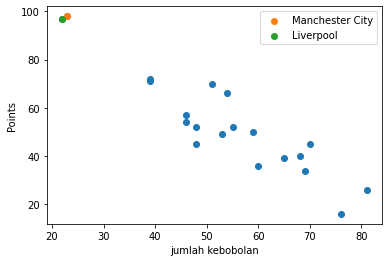

<Figure size 432x288 with 0 Axes>

In [203]:
plt.scatter(df['defence_goals_conceeded'],df['general_points'])
plt.scatter(df['defence_goals_conceeded'][0],df['general_points'][0], label='Manchester City')
plt.scatter(df['defence_goals_conceeded'][1],df['general_points'][1], label='Liverpool')
plt.xlabel('jumlah kebobolan')
plt.ylabel('Points')
plt.legend()
plt.show()
plt.savefig('foo5.png')

**Dari grafik di atas, secara general ternyata semakin banyak jumlah kebobolan pada suatu tim point akhir yang didapat juga semakin kecil**<br>

**Walaupun Manchester City juara tetapi Liverpool memiliki jumlah kebobolan paling sedikit**

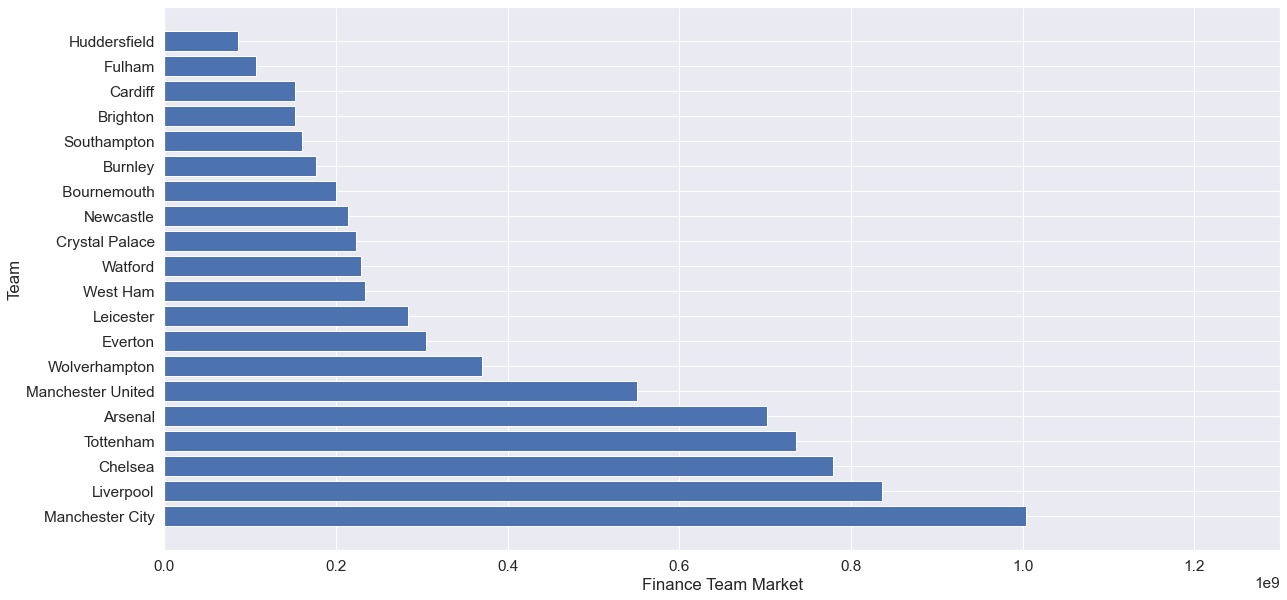

In [70]:
plt.figure(figsize=(20,10))
plt.barh(df['Team'], df['finance _team_market'])
plt.xlabel('Finance Team Market')
plt.ylabel('Team')
plt.xlim(0, 1300000000)
plt.show()

**Sepertinya wajar jika Manchester City Juara karena mereka memiliki Finansial yang paling bagus diantara semua tim, tapi ini hanya satu aspek saja, tentu kita harus melihat semua aspek mengapa Manchester city juara.**

In [28]:
by_category = df.groupby(by=['category']).count()

In [29]:
team_label = list(by_category.index)

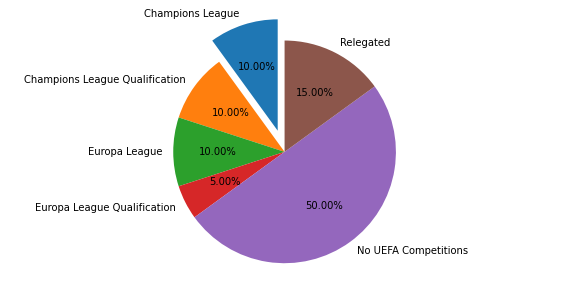

In [30]:
explode_list = [0.2,0,0,0,0,0]

plt.figure(figsize=(10,5))
plt.pie(by_category['Team'], labels=team_label,
       autopct='%.2f%%',
       explode = explode_list,
       startangle = 90)
plt.axis('equal')
plt.show()

**Dari Piechart di atas, hanya 10% Team EPL yang mengikuti Champions League**

In [46]:
df_versus = df.copy()
df_versus['total_goal'] = df_versus['attack_goals_counter'] +  df_versus['attack_goals_freekick'] + df_versus['attack_goals_headed'] + df_versus['attack_goals_penalty'] + df_versus['attack_goals_box'] + df_versus['attack_goals_outsidebox']

In [48]:
df_versus

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,total_goal
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,117
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,122
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6,78
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2,92
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3,88
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,11,66,26,27.3,21,550440000,22017600,"19,202",63,"2,242","2,634",638,200,526,225,4,9,55,10,73,4,4,2,122,128,355,581,2,785,370,6,53.3,82.3,84
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,1,57,23,27.2,13,369600000,16068800,"16,618",51,"2,552","2,515",622,195,477,152,10,4,44,3,72,1,5,2,100,148,501,720,2,824,464,4,47.4,78.2,68
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,46,8,54,26,27.0,16,305360000,11748000,"16,494",44,"2,310","2,362",814,215,498,169,13,2,45,10,55,4,3,0,94,85,456,700,4,825,430,5,51.0,77.3,73
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,48,3,52,26,29.0,18,284240000,10929600,"17,219",88,"2,335","2,593",779,210,515,184,9,5,43,8,57,5,8,3,90,96,436,676,4,945,500,5,50.8,79.2,76
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,55,-3,52,26,28.3,18,234212000,9011200,"16,358",75,"2,315","2,273",630,188,441,157,10,5,47,5,59,1,3,0,148,141,457,723,5,855,397,5,49.0,78.7,70


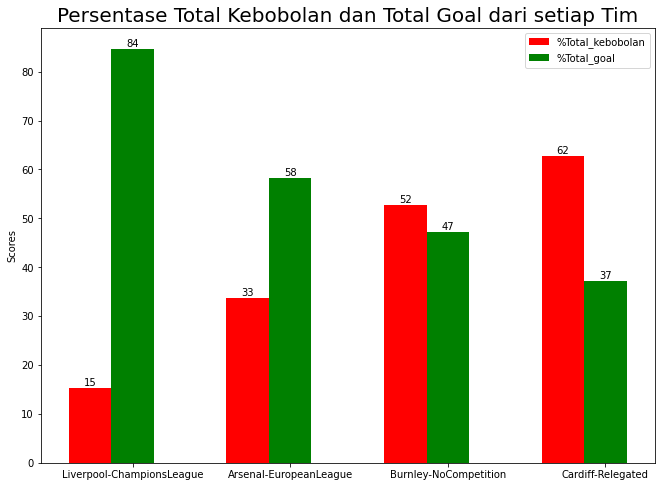

In [73]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

yvals = [(22/144)*100, (51/151)*100, (68/129)*100, (69/110)*100]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [(122/144)*100, (88/151)*100, (61/129)*100, (41/110)*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Liverpool-ChampionsLeague', 'Arsenal-EuropeanLeague', 'Burnley-NoCompetition', 'Cardiff-Relegated') )
ax.legend( (rects1[0], rects2[0]), ('%Total_kebobolan', '%Total_goal') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.title('Persentase Total Kebobolan dan Total Goal dari setiap Tim', fontsize=20)
plt.show()

**Terlihat dari grafik di atas, Tim Cardiff dan Burnley memiliki persentase kebobolan lebih besar dibandingkan persentase goalnya**

**sebagai analis, pada bursa tranfer nanti saya menyarankan untuk Cardiff dan Burnley untuk membeli bek dan kiper yang bagus agar dapat bersaing di EPL**